In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import datetime
import gc
import pandas as pd

import torch
import torch.nn as nn


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import pacmap

import random
def _set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).
 
    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if torch.cuda.is_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
_set_seed(1024)

/home/mirp_ai/anaconda3/envs/DANM/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mirp_ai/anaconda3/envs/DANM/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mirp_ai/anaconda3/envs/DANM/lib/python3.10/site-packages/umap/dist

In [14]:
import torch
import matplotlib.cm as cm
# Single methods
from sklearn.preprocessing import MinMaxScaler as Normalizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import kneighbors_graph
from sklearn import metrics
from sklearn.metrics import silhouette_samples
from sklearn.metrics import davies_bouldin_score as DB
from sklearn.metrics import calinski_harabasz_score as CH
from sklearn.preprocessing import LabelEncoder

from torch.utils.data import DataLoader
from torch.utils.data import random_split
from Zamuro_DataLoader import SoundscapeData
from Models import ConvAE as AE
from AE_training_functions import TestModel, TrainModel
from AE_Clustering import AE_Clustering 

In [3]:
df_ae = pd.read_csv(f"temporal_zamuro/Features/New_df_ae_unflat.csv")
audios = pd.read_csv(f"Complementary_Files/zamuro_audios_complete.csv", index_col=0)
recorders = pd.read_csv(f"Complementary_Files/zamuro_recorders.csv")

In [15]:
X = np.asarray(df_ae.loc[:,"0":"25919"])
y = list(df_ae.loc[:,"y"])
X = np.reshape(X, [X.shape[0], 5, X.shape[1]//5])
X = np.mean(X, axis=1)
X.shape, len(y)

y_hour = df_ae["hour"]
# y_hour = list(np.repeat(y_hour, 5))
y_cover = df_ae["cover"]
# y_cover = list(np.repeat(y_cover, 5))
y_site = df_ae["location"]
# y_site = list(np.repeat(y_site, 5))
y_stage = df_ae["hour_stage"]

encoder = LabelEncoder()
y_site = encoder.fit_transform(y_site)
y_cover = encoder.fit_transform(y_cover)
y_stage = encoder.fit_transform(y_stage)

In [16]:
X.shape, y_hour.shape

((53275, 5184), (53275,))

In [35]:
# mapper = umap.UMAP(n_components=2, min_dist=0.01,
#                             metric="euclidean", n_neighbors=75,
#                             random_state=0, n_jobs=-1).fit(X, y=y_hour)
X_UMAP = umap.UMAP(n_components=2, min_dist=0.01,                   
                            metric="euclidean", n_neighbors=75,
                            random_state=0, n_jobs=-1).transform(X)

X_UMAP = umap.UMAP(n_components=2, min_dist=0.01,
                            metric="euclidean", n_neighbors=75,
                            random_state=0, n_jobs=-1).fit_transform(X)

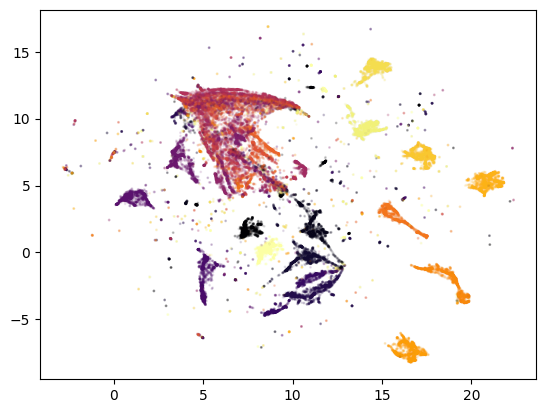

In [34]:
import matplotlib.colors as mcolors
labels = np.unique(y_hour)
cmap = plt.get_cmap("inferno", len(labels))
norm = mcolors.BoundaryNorm(np.arange(len(labels) + 1) - 0.5, len(labels))
scatter = plt.scatter(X_UMAP[:,0], X_UMAP[:,1], alpha=0.1, s=0.1, c=y_hour, cmap=cmap, norm=norm)

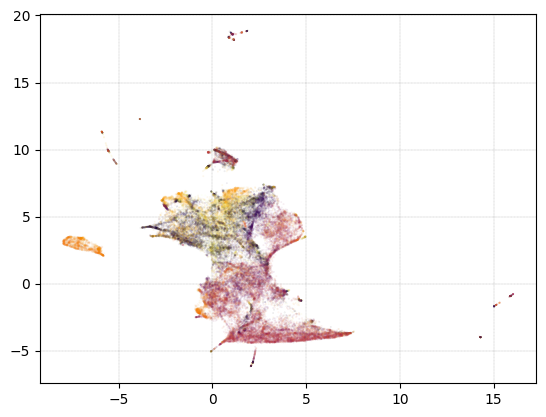

In [71]:
import matplotlib.colors as mcolors
labels = np.unique(y_hour)
cmap = plt.get_cmap("inferno", len(labels))
norm = mcolors.BoundaryNorm(np.arange(len(labels) + 1) - 0.5, len(labels))
scatter = plt.scatter(X_UMAP[:,0], X_UMAP[:,1], alpha=0.1, s=0.1, c=y_hour, cmap=cmap, norm=norm)
plt.grid(color='k', linestyle='-.', linewidth=0.1, which='both')